Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

sns.set_style("whitegrid")

Load the dataset

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

 Display the first few rows of the dataset

In [ ]:
print(df.head().to_string(index=False))

 Check the structure and missing values

In [ ]:
print(df.info())
print(df.isnull().sum())

Summary statistics for numerical features

In [ ]:
print(df.describe().to_string(index=False))

Explore the distribution of the target variable

In [ ]:
print(df['Attrition'].value_counts())

Visualize the distribution of numerical features using histograms

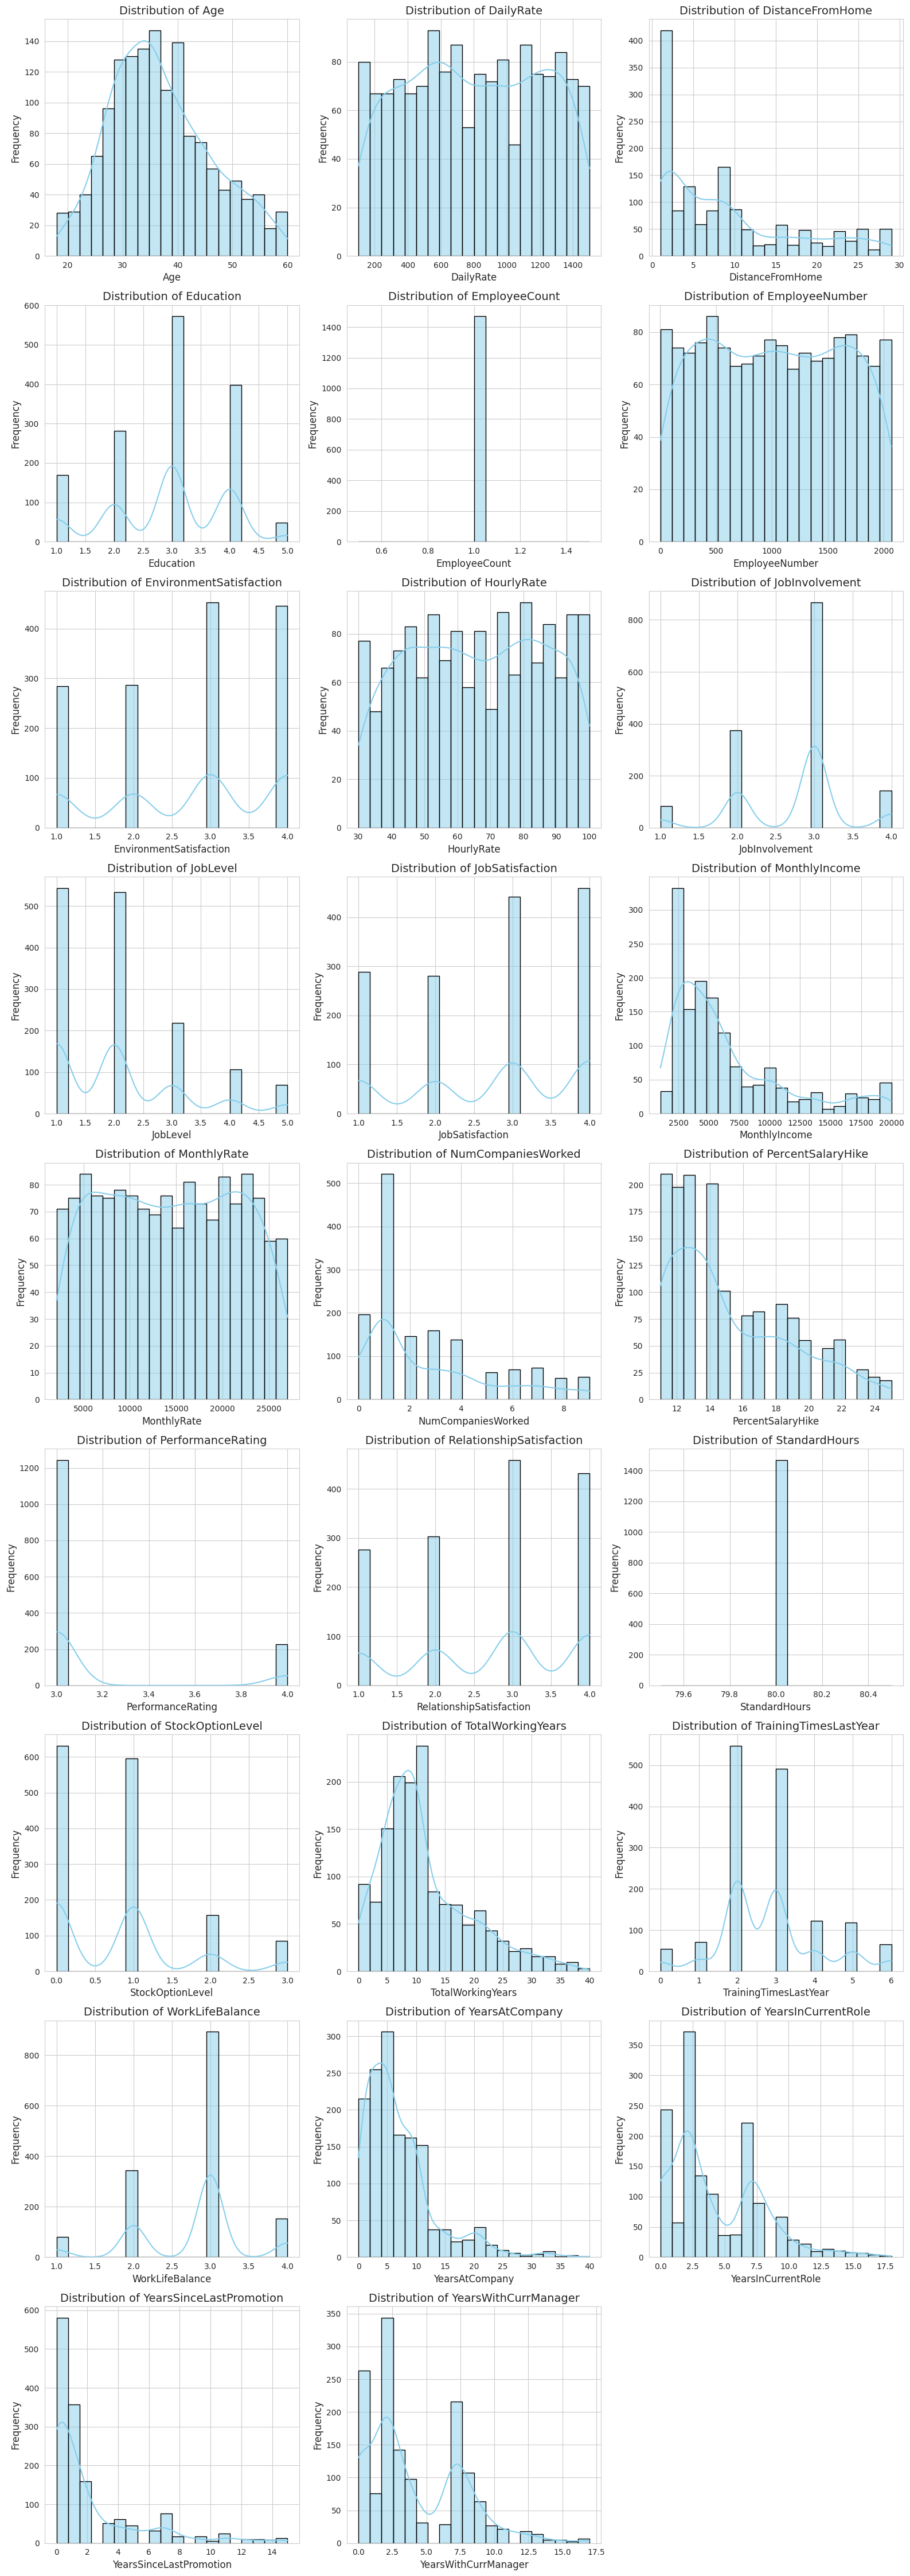

In [ ]:
def plot_numerical_distributions(data):
    num_features = data.select_dtypes(include=['int64', 'float64']).columns
    num_plots_per_row = 3
    num_rows = (len(num_features) + num_plots_per_row - 1) // num_plots_per_row

    plt.figure(figsize=(16, 5 * num_rows))

    for i, feature in enumerate(num_features):
        plt.subplot(num_rows, num_plots_per_row, i+1)
        sns.histplot(data[feature], bins=20, kde=True, color='skyblue', edgecolor='k')
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

plot_numerical_distributions(df)

Plot the correlation matrix

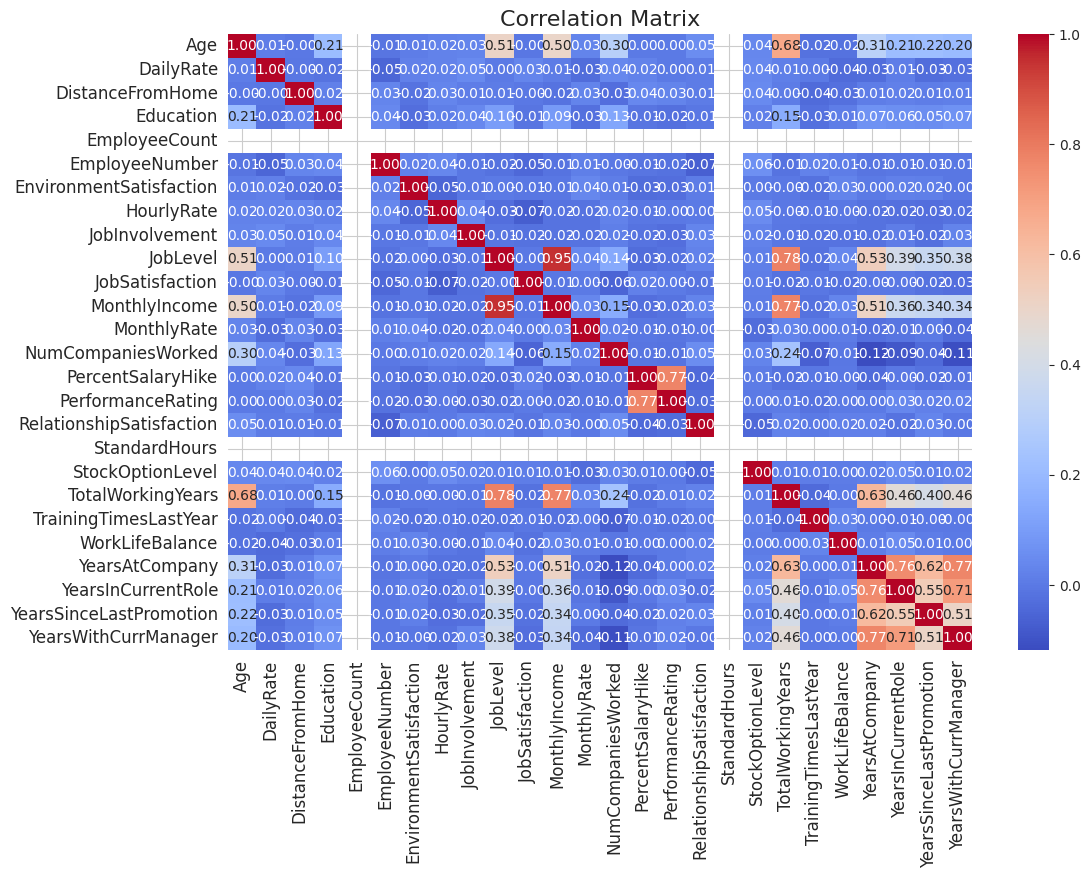

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Visualize the distribution of categorical features using bar plots

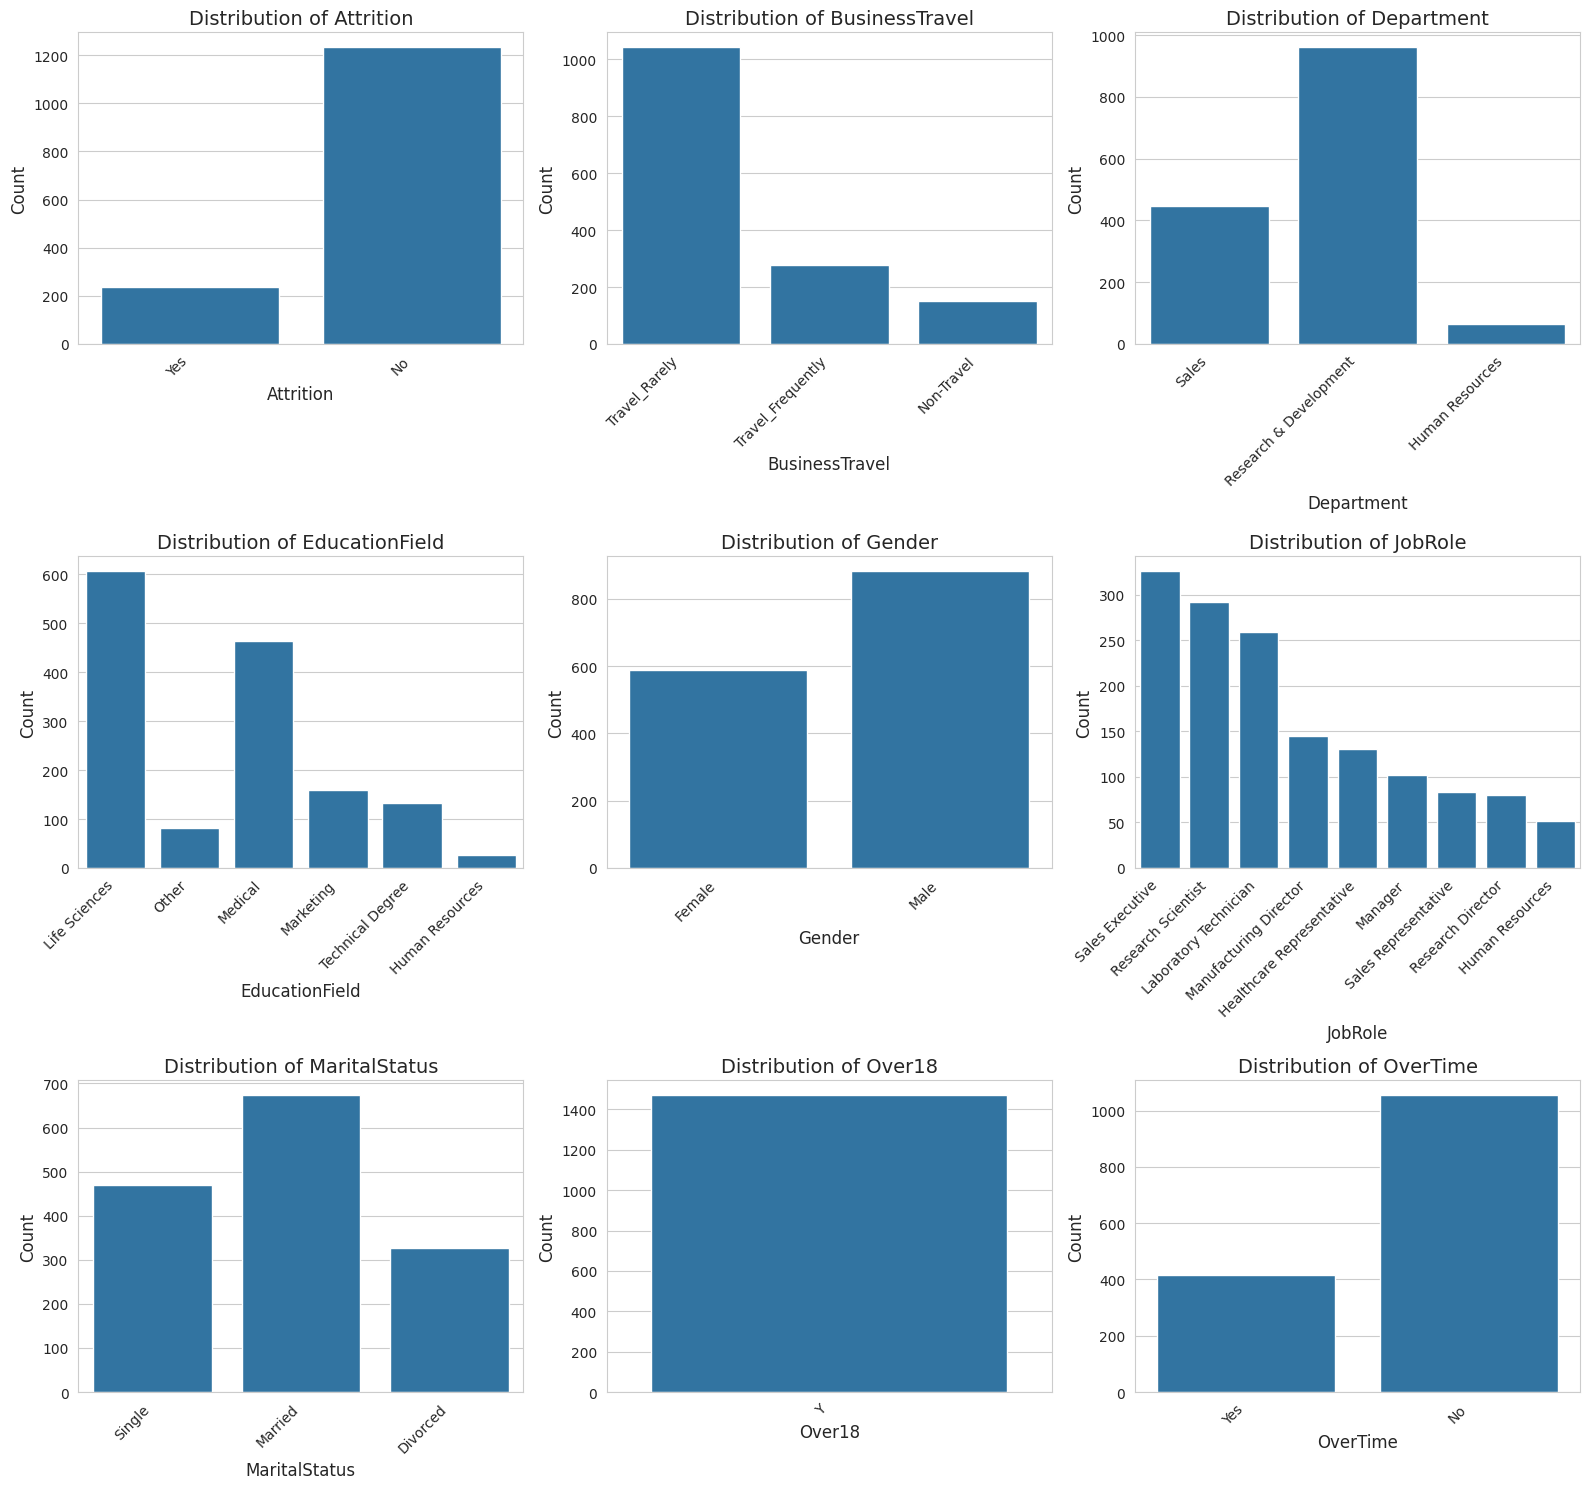

In [ ]:
def plot_categorical_distributions(data):
    cat_features = df.select_dtypes(include=['object']).columns
    cat_plots_per_row = 3
    cat_rows = (len(cat_features) + cat_plots_per_row - 1) // cat_plots_per_row

    plt.figure(figsize=(16, 5 * cat_rows))

    for i, feature in enumerate(cat_features):
        plt.subplot(cat_rows, cat_plots_per_row, i+1)
        sns.countplot(x=feature, data=df)
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

plot_categorical_distributions(df)


Preprocess the dataset

In [ ]:
X = df.drop(columns=['Attrition'])
y = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

One-hot encode categorical features and scale numerical features

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Create preprocessing pipeline

In [ ]:
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

Fit and transform the training data

In [ ]:
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)

Apply SMOTE resampling

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

Transform the test data

In [ ]:
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

Train and evaluate different models

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")


In [ ]:
# Define models with best parameters (assumed to be tuned elsewhere)
logistic_regression = LogisticRegression(max_iter=500)
svm = SVC(probability=True)
neural_network = MLPClassifier(max_iter=500)
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

In [ ]:

# Evaluate each model
evaluate_model(logistic_regression, X_train_resampled, y_train_resampled, X_test_preprocessed, y_test, "Logistic Regression")
evaluate_model(svm, X_train_resampled, y_train_resampled, X_test_preprocessed, y_test, "Support Vector Machine")
evaluate_model(neural_network, X_train_resampled, y_train_resampled, X_test_preprocessed, y_test, "Neural Network")
evaluate_model(random_forest, X_train_resampled, y_train_resampled, X_test_preprocessed, y_test, "Random Forest")
evaluate_model(gradient_boosting, X_train_resampled, y_train_resampled, X_test_preprocessed, y_test, "Gradient Boosting")


Logistic Regression:
Accuracy: 0.7721, Precision: 0.6442, Recall: 0.7093, F1-score: 0.6596

Support Vector Machine:
Accuracy: 0.8503, Precision: 0.7177, Recall: 0.6784, F1-score: 0.6944

Neural Network:
Accuracy: 0.8367, Precision: 0.6961, Recall: 0.6961, F1-score: 0.6961

Random Forest:
Accuracy: 0.8605, Precision: 0.7911, Recall: 0.5983, F1-score: 0.6250

Gradient Boosting:
Accuracy: 0.8605, Precision: 0.7532, Recall: 0.6414, F1-score: 0.6716



In [ ]:

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('svm', svm),
    ('nn', neural_network),
    ('gb', gradient_boosting)
], voting='soft', n_jobs=-1)

voting_clf.fit(X_train_resampled, y_train_resampled)
y_pred_voting = voting_clf.predict(X_test_preprocessed)

In [ ]:
# Evaluate the voting classifier
evaluate_model(voting_clf, X_train_resampled, y_train_resampled, X_test_preprocessed, y_test, "Voting Classifier")

Voting Classifier:
Accuracy: 0.8571, Precision: 0.7332, Recall: 0.6910, F1-score: 0.7083



In [36]:
new_data = pd.DataFrame({
    'Age': [34],
    'BusinessTravel': ['Travel_Rarely'],
    'DailyRate': [1102],
    'Department': ['Sales'],
    'DistanceFromHome': [10],
    'Education': [3],
    'EducationField': ['Life Sciences'],
    'EmployeeCount': [1],
    'EmployeeNumber': [1],
    'EnvironmentSatisfaction': [2],
    'Gender': ['Female'],
    'HourlyRate': [94],
    'JobInvolvement': [3],
    'JobLevel': [2],
    'JobRole': ['Sales Executive'],
    'JobSatisfaction': [4],
    'MaritalStatus': ['Single'],
    'MonthlyIncome': [5993],
    'MonthlyRate': [19479],
    'NumCompaniesWorked': [8],
    'Over18': ['Y'],
    'OverTime': ['Yes'],
    'PercentSalaryHike': [11],
    'PerformanceRating': [3],
    'RelationshipSatisfaction': [1],
    'StandardHours': [80],
    'StockOptionLevel': [0],
    'TotalWorkingYears': [8],
    'TrainingTimesLastYear': [0],
    'WorkLifeBalance': [1],
    'YearsAtCompany': [6],
    'YearsInCurrentRole': [4],
    'YearsSinceLastPromotion': [0],
    'YearsWithCurrManager': [5]
})

# Apply the same preprocessing steps as during training
new_data_scaled = preprocessor.transform(new_data)

# Make predictions
predictions = voting_clf.predict(new_data_scaled)

# Convert predictions back to the original label
predictions_label = ['Yes' if pred == 1 else 'No' for pred in predictions]
print("Prediction: " , predictions_label[0])

Prediction:  Yes


In [37]:
# New data likely to result in 'No'
new_data_no = pd.DataFrame({
    'Age': [45],
    'BusinessTravel': ['Travel_Rarely'],
    'DailyRate': [800],
    'Department': ['Research & Development'],
    'DistanceFromHome': [5],
    'Education': [4],
    'EducationField': ['Life Sciences'],
    'EmployeeCount': [1],
    'EmployeeNumber': [2],
    'EnvironmentSatisfaction': [4],
    'Gender': ['Male'],
    'HourlyRate': [70],
    'JobInvolvement': [3],
    'JobLevel': [3],
    'JobRole': ['Research Scientist'],
    'JobSatisfaction': [4],
    'MaritalStatus': ['Married'],
    'MonthlyIncome': [9000],
    'MonthlyRate': [20000],
    'NumCompaniesWorked': [1],
    'Over18': ['Y'],
    'OverTime': ['No'],
    'PercentSalaryHike': [15],
    'PerformanceRating': [3],
    'RelationshipSatisfaction': [4],
    'StandardHours': [80],
    'StockOptionLevel': [2],
    'TotalWorkingYears': [20],
    'TrainingTimesLastYear': [3],
    'WorkLifeBalance': [4],
    'YearsAtCompany': [15],
    'YearsInCurrentRole': [10],
    'YearsSinceLastPromotion': [5],
    'YearsWithCurrManager': [7]
})

# Apply the same preprocessing steps as during training
new_data_no_scaled = preprocessor.transform(new_data_no)

# Make predictions
predictions_no = voting_clf.predict(new_data_no_scaled)

# Convert predictions back to the original label
predictions_no_label = ['Yes' if pred == 1 else 'No' for pred in predictions_no]
print("prediction: ",predictions_no_label[0] )


prediction:  No


In [31]:
numeric_features = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
    'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
    'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
    'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
    'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]
categorical_features = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus', 'Over18', 'OverTime'
]


# Function to get user input
def get_user_input():
    data = {}
    data['Age'] = int(input("Age: "))
    data['BusinessTravel'] = input("BusinessTravel (Travel_Rarely, Travel_Frequently, Non-Travel): ")
    data['DailyRate'] = int(input("DailyRate: "))
    data['Department'] = input("Department (Sales, Research & Development, Human Resources): ")
    data['DistanceFromHome'] = int(input("DistanceFromHome: "))
    data['Education'] = int(input("Education (1 to 5): "))
    data['EducationField'] = input("EducationField (Life Sciences, Medical, Marketing, Technical Degree, Human Resources, Other): ")
    data['EmployeeCount'] = 1
    data['EmployeeNumber'] = int(input("EmployeeNumber: "))
    data['EnvironmentSatisfaction'] = int(input("EnvironmentSatisfaction (1 to 4): "))
    data['Gender'] = input("Gender (Male, Female): ")
    data['HourlyRate'] = int(input("HourlyRate: "))
    data['JobInvolvement'] = int(input("JobInvolvement (1 to 4): "))
    data['JobLevel'] = int(input("JobLevel (1 to 5): "))
    data['JobRole'] = input("JobRole (e.g., Sales Executive, Research Scientist): ")
    data['JobSatisfaction'] = int(input("JobSatisfaction (1 to 4): "))
    data['MaritalStatus'] = input("MaritalStatus (Single, Married, Divorced): ")
    data['MonthlyIncome'] = int(input("MonthlyIncome: "))
    data['MonthlyRate'] = int(input("MonthlyRate: "))
    data['NumCompaniesWorked'] = int(input("NumCompaniesWorked: "))
    data['Over18'] = 'Y'
    data['OverTime'] = input("OverTime (Yes, No): ")
    data['PercentSalaryHike'] = int(input("PercentSalaryHike: "))
    data['PerformanceRating'] = int(input("PerformanceRating (1 to 4): "))
    data['RelationshipSatisfaction'] = int(input("RelationshipSatisfaction (1 to 4): "))
    data['StandardHours'] = 80
    data['StockOptionLevel'] = int(input("StockOptionLevel (0 to 3): "))
    data['TotalWorkingYears'] = int(input("TotalWorkingYears: "))
    data['TrainingTimesLastYear'] = int(input("TrainingTimesLastYear: "))
    data['WorkLifeBalance'] = int(input("WorkLifeBalance (1 to 4): "))
    data['YearsAtCompany'] = int(input("YearsAtCompany: "))
    data['YearsInCurrentRole'] = int(input("YearsInCurrentRole: "))
    data['YearsSinceLastPromotion'] = int(input("YearsSinceLastPromotion: "))
    data['YearsWithCurrManager'] = int(input("YearsWithCurrManager: "))

    return pd.DataFrame([data])

# Get user input
user_input = get_user_input()

# Apply the same preprocessing steps as during training
user_input_scaled = preprocessor.transform(user_input)

# Make predictions
predictions = voting_clf.predict(user_input_scaled)

# Convert predictions back to the original label
predictions_label = ['Yes' if pred == 1 else 'No' for pred in predictions]
print(f"The prediction for attrition is: {predictions_label[0]}")

Age: 30
BusinessTravel (Travel_Rarely, Travel_Frequently, Non-Travel): Non-Travel
DailyRate: 600
Department (Sales, Research & Development, Human Resources): Research & Development
DistanceFromHome: 30
Education (1 to 5): 4
EducationField (Life Sciences, Medical, Marketing, Technical Degree, Human Resources, Other): Technical Degree
EmployeeNumber: 3
EnvironmentSatisfaction (1 to 4): 3
Gender (Male, Female): Male
HourlyRate: 30
JobInvolvement (1 to 4): 3
JobLevel (1 to 5): 2
JobRole (e.g., Sales Executive, Research Scientist): Research Scientist
JobSatisfaction (1 to 4): 3
MaritalStatus (Single, Married, Divorced): Single
MonthlyIncome: 3000
MonthlyRate: 12000
NumCompaniesWorked: 3
OverTime (Yes, No): Yes
PercentSalaryHike: 10
PerformanceRating (1 to 4): 3
RelationshipSatisfaction (1 to 4): 3
StockOptionLevel (0 to 3): 0
TotalWorkingYears: 3
TrainingTimesLastYear: 2
WorkLifeBalance (1 to 4): 2
YearsAtCompany: 2
YearsInCurrentRole: 1
YearsSinceLastPromotion: 1
YearsWithCurrManager: 1
Th